### Data Acquisition

In [38]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import joblib

*Note: Ensure `raw_salary_data.csv` is in the same directory as this notebook before running the code.*

In [39]:
#Loading data from csv to Pandas dataframe
df = pd.read_csv('raw_salary_data.csv')

### Data Exploration

In [40]:
# Displays the first five rows of the dataset.
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [41]:
# Provides the number of rows and columns in the dataset.
df.shape

(6704, 6)

In [42]:
# Identifies the data types of each column.
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [43]:
#Describes the summary statistics of the entire dataset
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Data Wrangling

In [44]:
# Returns the number of missing values in each column.
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [45]:
# Dropping null values 
df.dropna(inplace=True)

In [46]:
# Displays the updated shape of the dataset after removal of null values
df.shape

(6698, 6)

In [47]:
# Returns unique value counts of Job Titles 
df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [48]:
#Returns the number of unique job titles
df['Job Title'].nunique()

191

In [49]:
# Replacing Job titles less than 25 counts with 'Others'
job_count = df['Job Title'].value_counts()
updated_job_title = job_count[job_count<25]
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in updated_job_title else x )
df['Job Title'].value_counts()

Job Title
Software Engineer                   518
Data Scientist                      453
Others                              381
Software Engineer Manager           376
Data Analyst                        363
Senior Project Engineer             318
Product Manager                     313
Full Stack Engineer                 308
Marketing Manager                   255
Senior Software Engineer            244
Back end Developer                  244
Front end Developer                 241
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                88
Web Developer                        87
Product Designer                     75
Research Director                    75
Content Marketing Manager            73
Sales Associate               

In [50]:
# Standardizing the correct version
df['Job Title'] = df['Job Title'].replace('Front end Developer', 'Front End Developer')

In [51]:
#Returns the number of unique job titles after the update
df['Job Title'].nunique()

50

In [52]:
# Gets unique job titles 
job_titles = df['Job Title'].unique().tolist()
# Saving job titles for later use for model deployment
joblib.dump(job_titles, 'job_titles.pkl')

['job_titles.pkl']

In [53]:
#Returns unique value counts of Education levels
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [54]:
# Replaces specific education level values with shorter versions for consistency
df['Education Level'] = df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"])

In [55]:
#Returns unique value counts of Education levels after the update
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [56]:
#Returns unique value counts of Gender
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

### Exploratory Data Analysis and Visualization

In [57]:
#Describes the summary statistics after the updates
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


#### Visualizing Distributions

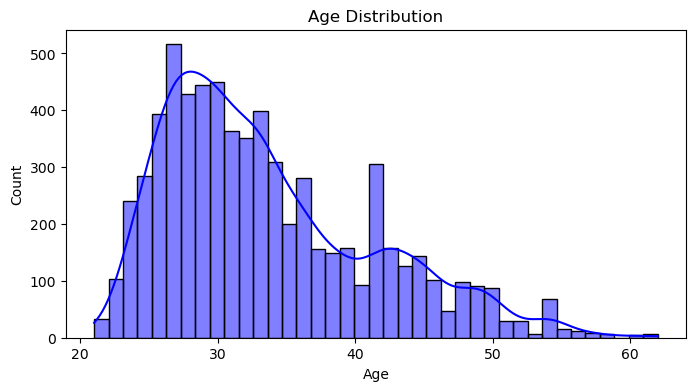

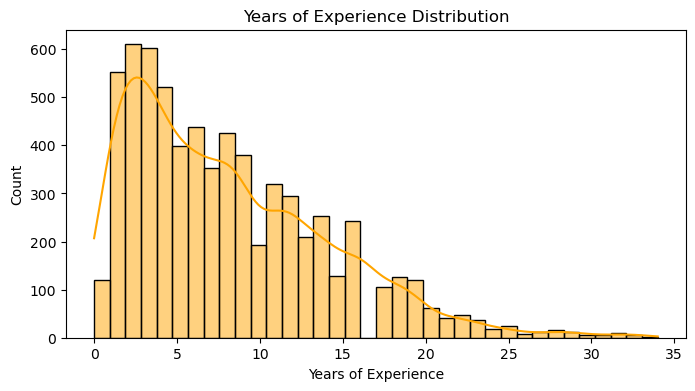

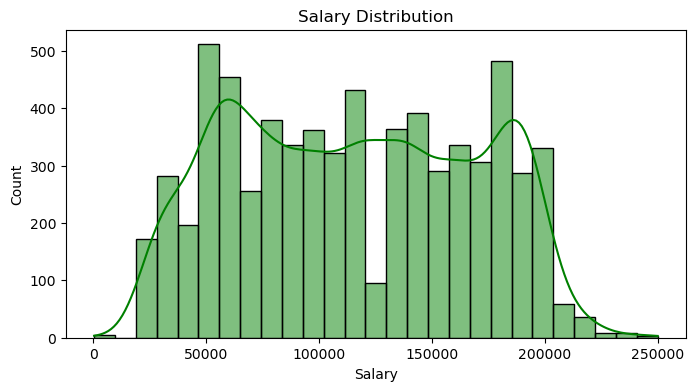

In [58]:
# Creates a histogram for Age 
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], color='blue', kde=True)
plt.title('Age Distribution')
plt.show()

# Creates a histogram for Years of Experience
plt.figure(figsize=(8,4))
sns.histplot(df['Years of Experience'], color='orange', kde=True)
plt.title('Years of Experience Distribution')
plt.show()

# Creatse a histogram for Salary 
plt.figure(figsize=(8,4))
sns.histplot(df['Salary'], color='green', kde=True)
plt.title('Salary Distribution')
plt.show();

- Age Distribution: The plot shows that majority of workforce lies in the 26-30 age range which suggests a highly youthful workforce.

- Years of Experience Distribution: The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts

- Salary Distribution: The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. 

#### Visualizing Compositions

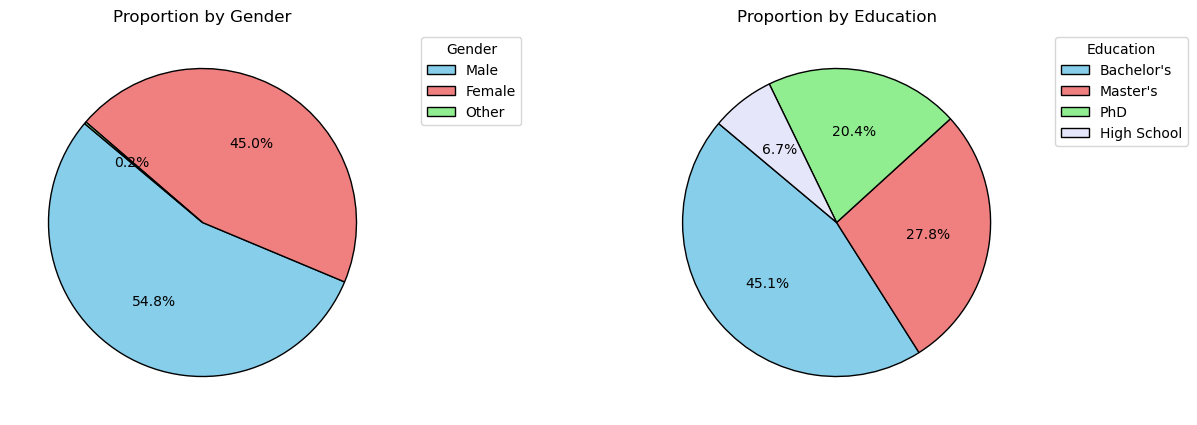

In [59]:
# Counts the occurrences of each Gender and Education level
gender_counts = df['Gender'].value_counts()
edlevel_counts = df['Education Level'].value_counts()

colors = ['skyblue','lightcoral','lightgreen','lavender']
plt.figure(figsize=(15, 5))

# Creates the pie chart for Gender
plt.subplot(1,2,1)
plt.pie(gender_counts, autopct='%1.1f%%',colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=gender_counts.index,title='Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Proportion by Gender')

# Creates the pie chart for Education Level
plt.subplot(1,2,2)
plt.pie(edlevel_counts, autopct='%1.1f%%',colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(labels=edlevel_counts.index,title='Education',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Proportion by Education');

#### Visualizing Comparisons

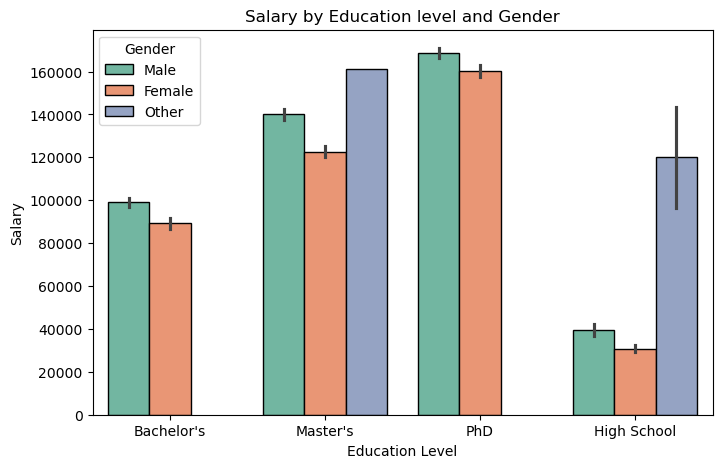

In [60]:
#Creates a bar plot for Salary, Education Level and Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender', palette='Set2', edgecolor='black').set(title='Salary by Education level and Gender');

The plot shows men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

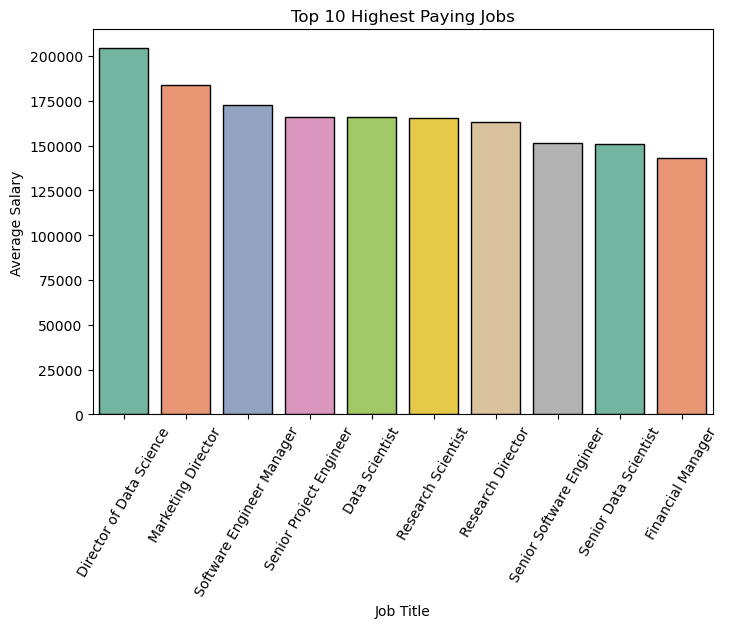

In [61]:
# Get the top 10 job titles with the highest mean salary
top_10_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Creates a bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette='Set2', hue=top_10_jobs.index, legend=False, edgecolor='black')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60);

#### Encoding

In [62]:
#Ordinal encoding Education Level
ordinal_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}
df['Education Level'] = df['Education Level'].map(ordinal_mapping)

#Label encoding Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

#Returns the dataframe
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,2,Software Engineer,5.0,90000.0
1,28.0,0,3,Data Analyst,3.0,65000.0
2,45.0,1,4,Others,15.0,150000.0
3,36.0,0,2,Sales Associate,7.0,60000.0
4,52.0,1,3,Others,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,4,Director of Marketing,20.0,200000.0
6700,32.0,1,1,Sales Associate,3.0,50000.0
6701,30.0,0,2,Financial Manager,4.0,55000.0
6702,46.0,1,3,Marketing Manager,14.0,140000.0


#### Visualizing Relations

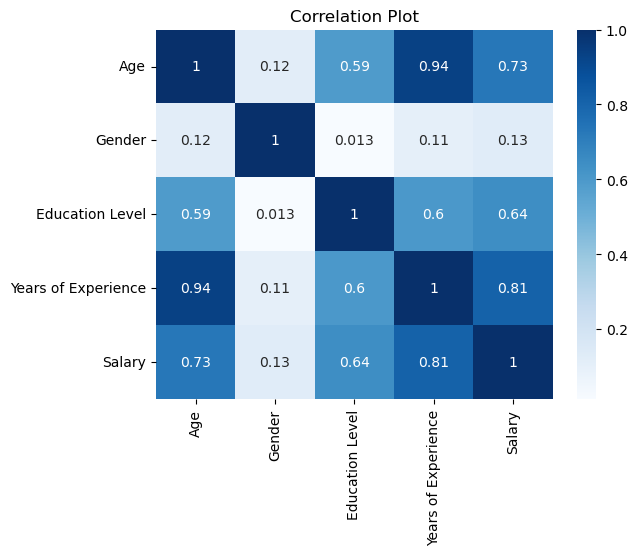

In [63]:
#Correlation plot
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')  # Use cmap for color map
plt.title('Correlation Plot') ;

The heatmap reveals
- Highest correlation between age and years of experience
- High correlation between salary and years of experience
- High correlation between salary and age
- Moderately high correlation between salary and education level
- Low correlation between gender and all variables

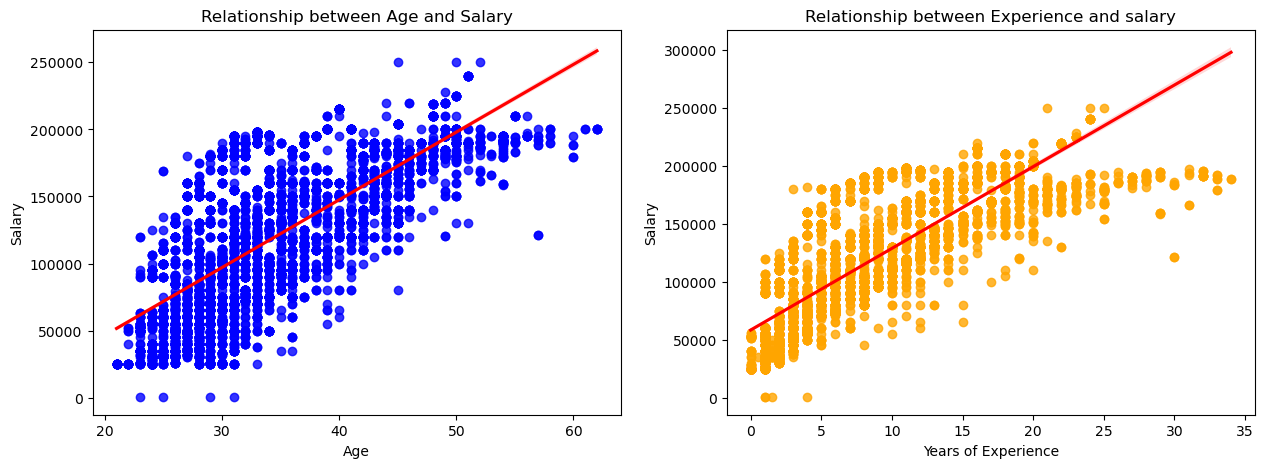

In [64]:
plt.figure(figsize=(15, 5))

#Creates a Scatter plot for age and salary
plt.subplot(1,2,1)
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Relationship between Age and Salary');

#Creates a Scatter plot for experience and salary
plt.subplot(1,2,2)
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'red'})
plt.title('Relationship between Experience and salary');

There is a strong positive correlation between age and salary meaning older employees get paid more than younger employees.
There is also a strong positive correlation between Experience and salary meaning experienced candidates get paid more. 

### Prediction - Salary

#### Feature Engineering

In [65]:
#One hot encoding by creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'])
df = pd.concat([df,dummies],axis=1)

#Droping Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Back end Developer,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,2,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,3,3.0,65000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,4,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,2,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,3,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
#Separating the dataset into features and target
#Dataset conntaining all features from df
features = df.drop('Salary',axis=1)
#Series containing target variable to be predicted
target = df['Salary']

In [67]:
#Splitting data for 75% training and 25% testing
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 54)

In [68]:
# Saves the feature column names for model deployment
joblib.dump(x_train.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

Three regression models - Random Forest Regressor, Decision Tree Regressor and Linear Regression are used and evaluated by performance metrics such as R-squared (R²) and Mean Squared Error (MSE). The goal is to identify the best model for prediction that captures the underlying patterns in the data, thereby providing the most precise salary predictions.​

#### Hyperparameter optimization

In [69]:
# Creating dictionary for defining models and tuning hyperparameters
model_params = {
    'Random_Forest':{
        'model':RandomForestRegressor(random_state=42),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(random_state=42),
        'params':{
            'max_depth':[2,4,6,8,10],
            'min_samples_split':[2,5,10,20]
        }
    },
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{        
        }
    }
}
# Finds the best parameters for the models using Hyper parameter tuning through grid search cv
score=[]
for model_name,m in model_params.items():
    grid = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    grid.fit(x_train,y_train)
    score.append({
        'Model':model_name,
        'Params':grid.best_params_,
        'MSE(-ve)':grid.best_score_
    })
pd.DataFrame(score)  

,Model,Params,MSE(-ve)
0,Random_Forest,{'n_estimators': 80},-6.286994e+07
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 2}",-1.483721e+08
2,Linear_Regression,{},-4.642094e+08


#### Model Training and Evaluation

In [70]:
#Random Forest model
rfr = RandomForestRegressor(n_estimators=80,random_state=42)
rfr.fit(x_train,y_train)
print('R square value of RF Model:',rfr.score(x_test,y_test))
y_pred_rfr = rfr.predict(x_test)
print('Mean Squared Error of RF Model:',mean_squared_error(y_test,y_pred_rfr))

# Decision Tree model
dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=42)
dtr.fit(x_train,y_train)
print('R square value of DT Model:',dtr.score(x_test,y_test))
y_pred_dtr = dtr.predict(x_test)
print('Mean Squared Error of DT Model:',mean_squared_error(y_test,y_pred_dtr))

#Linear Regression Model
lr = LinearRegression()
lr.fit(x_train,y_train)
print('R square value of LR Model:',lr.score(x_test,y_test))
y_pred_lr = lr.predict(x_test)
print('Mean Squared Error of LR Model:',mean_squared_error(y_test,y_pred_lr))

R square value of RF Model: 0.9736149127543893
Mean Squared Error of RF Model: 75231217.83571847
R square value of DT Model: 0.9442792655154507
Mean Squared Error of DT Model: 158875302.36121202
R square value of LR Model: 0.833031178286487
Mean Squared Error of LR Model: 476074521.9893924


1. The Random Forest model achieved the highest R-squared score of 0.973 and the lowest MSE indicating the best predictive performance among the three models.
2. The Decision Tree model performed well with a score of 0.942 but have higher errors compared to the Random Forest.
3. The Linear Regression model have the lowest score of 0.833 compared to the other models and highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.

Considering both the R² scores and MSE values, the **Random Forest** model appears to be the most suitable choice for this dataset, offering the highest predictive accuracy and the lowest error metrics. 

#### Model Prediction

In [71]:
# Predicts on test data by taking the best model
test_predictions = rfr.predict(x_test)

# Stores results in a DataFrame
test_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': test_predictions})
test_results.head()  # Display the first few predictions

,Actual,Predicted
0,150000.0,150000.000000
1,75969.0,86335.395833
2,100000.0,100000.000000
3,60000.0,61552.416100
4,80000.0,80062.500000


In [72]:
# Saving the trained model
joblib.dump(rfr, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

#### Model Deployment Note  
The model training and preprocessing steps are completed in this notebook.  
For deployment, a **Streamlit web application** has been created in `app.py`. 
To run the app:  
1. Open **VS Code / Terminal** and open`app.py`file
2. Run the code (Make sure to install streamlit before running)
3. The interactive salary prediction app will open in your browser

This allows users to input their details and get real-time salary predictions.